# FMCW radar working principle simulation based on python — Chapter 1：Distance simulation

This article will introduce how to use python to implement the simulation of FMCW working principle, the first chapter content will introduce the principle of distance detection.

## Part 1: Principle of distance detection

A modulated continuous wave radar also called as Frequency modulated continuous wave (FMCW) radar is a system that is able to measure the range of the target using a technique known as Frequency Modulation. In Frequency Modulation, the frequency of the electromagnetic wave is linearly increased with time. In other words, the transmitted frequency will change at a constant rate. This kind of signal whose frequency increases linearly with time is called a Chirp. The FMCW system measures the instantaneous difference between the transmitted and reflected signal frequencies δf, which is directly proportional to the time difference δt of the reflected chirp. The time difference can be used to calculate the range of the target.

The figure below (left) shows a frequency vs time representation of a chirp and the figure on the right shows an amplitude vs time plot for a chirp signal whose frequency increases linearly with time. A chirp is characterized by the start frequency ( fc), Bandwidth ( B) and duration ( Tc). The slope of a chirp defines the rate at which the chirp ramps up.

![figure1](img\infineonFig1.png)

A single target in front of the radar produces an IF signal that is a constante frequency tone, the frequency given by:

$$
IF_{frequency} = \frac{2Sd}{c}
$$

- $d$ is the distance of the target from the radar in m.
- $c$ is the speed of light in m/s
- $S$ is the slope of the chirp, given by the rate of change of bandwidth over the chirp duration.

So we can calculate the distance by measuring the frequency which can be achieved by FFT of IF signal.

## Part 2: Python simulation

1. Radar parameters setting: this step will set the basic parameters in a radar system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Radar parameters setting
maxR = 200 #Maximum range
rangeRes = 1 #Range resolution 
maxV = 70 #Maximum speed
fc = 2e9 #Carrier frequency
c = 3e8 #Speed of light

r0 = 100 #Target distance
v0 = 70 #Target speed

B = c/(2*rangeRes) #Bandwidth
Tchirp = 5.5*2*maxR/c #Chirp time
endle_time = 6.3e-6 
slope = B/Tchirp #Chirp slope
f_IFmax = (slope*2*maxR)/c #Maximum IF frequency
f_IF = (slope*2*r0)/c #Current IF frequency

Nd = 8 #Number of chirp
Nr = 64 #Numnber ADC sampling points
vres = (c/fc)/(2*Nd*(Tchirp+endle_time)) #Speed resolution 
Fs = Nr/Tchirp #Sampling rate

2. Signal of Tx: assuming that the Tx signal is a cosine signal whose frequency varies linearly with time.

Text(0, 0.5, 'Amplitude')

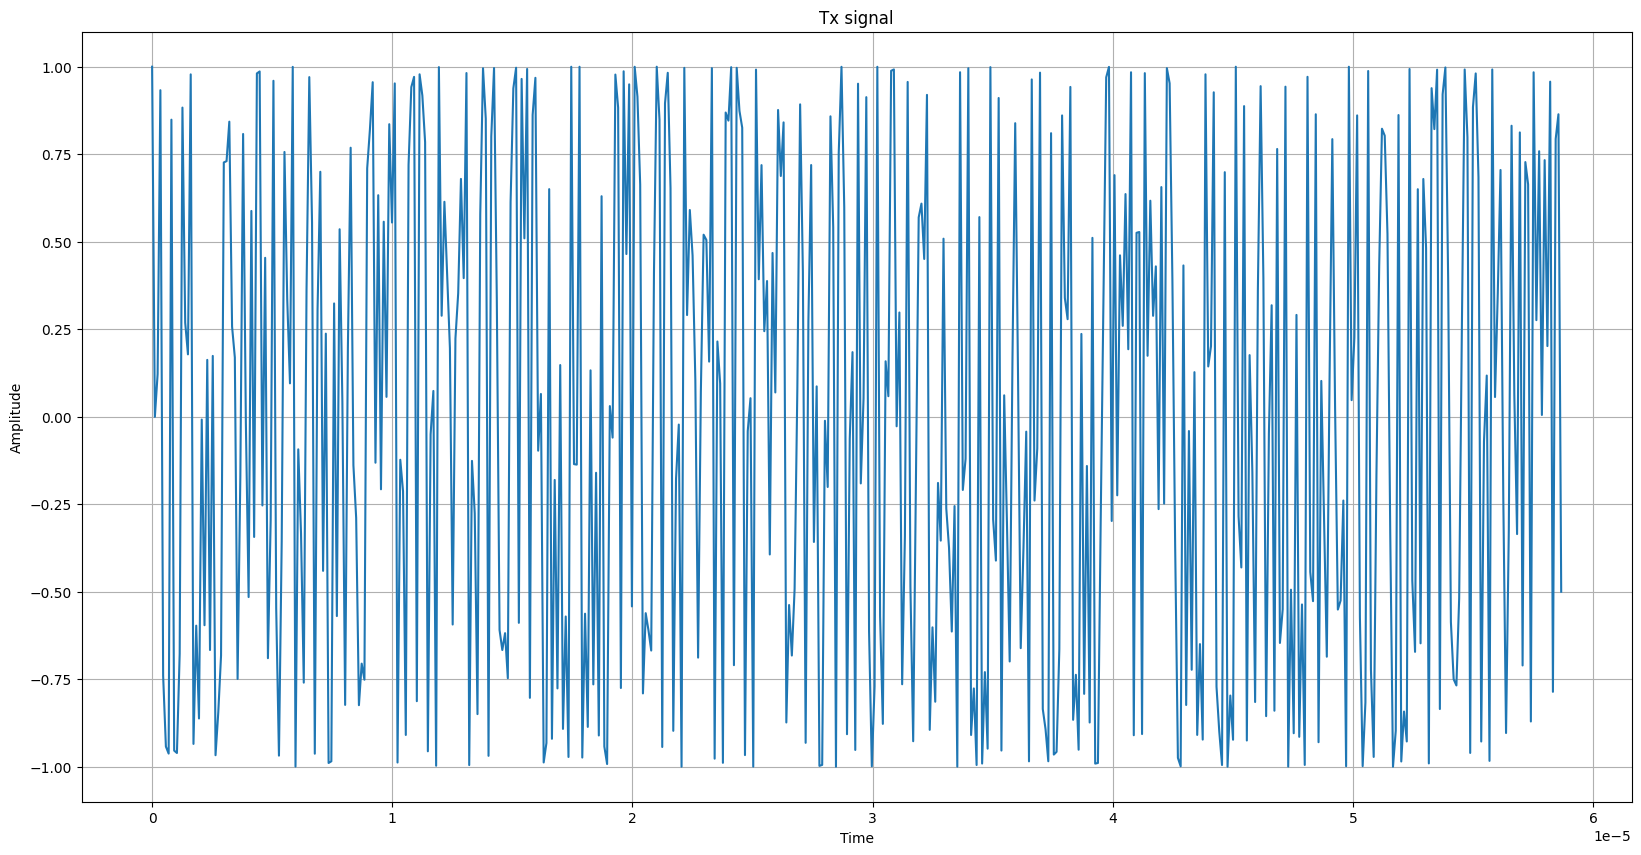

In [24]:
t = np.linspace(0,Nd*Tchirp,Nr*Nd) #Time of Tx and Rx
angle_freq = fc*t+(slope*t*t)/2 #Tx signal angle speed
freq = fc + slope*t #Tx frequency
Tx = np.cos(2*np.pi*angle_freq) #Waveform of Tx

plt.figure(figsize=(20,10))
plt.plot(t[0:1024],Tx[0:1024])
plt.grid()
plt.title('Tx signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

3. Signal of RX: the Rx waveform can be calculated from the Tx waveform and the delay time.

Text(0, 0.5, 'Amplitude')

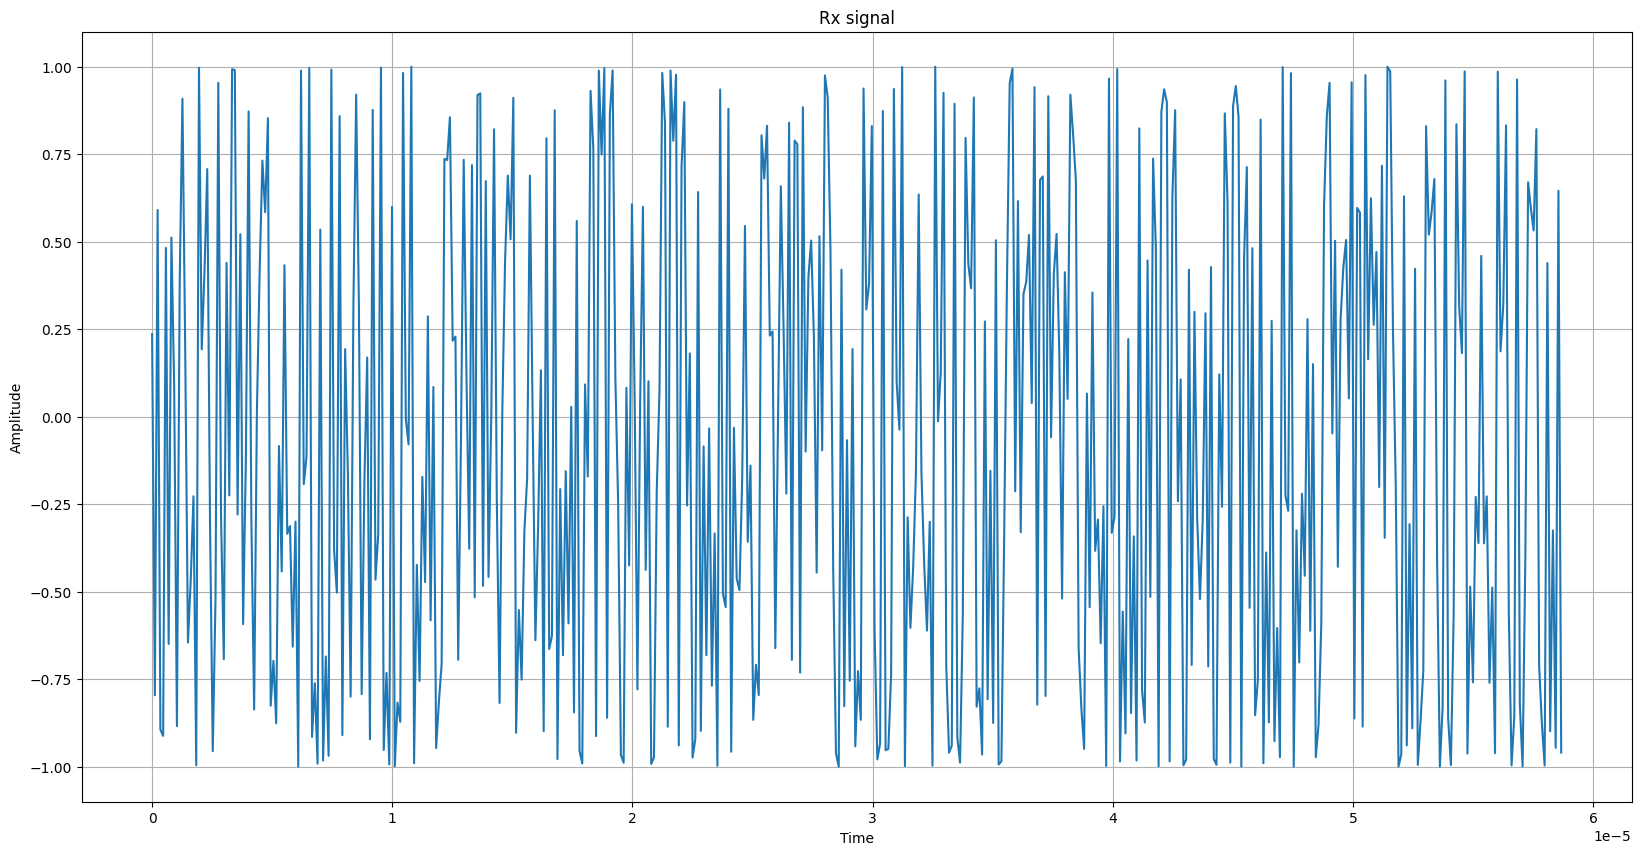

In [26]:
td = 2*r0/c
freqRx = fc + slope*(t)
Rx = np.cos(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))

plt.figure(figsize=(20,10))
plt.plot(t,Rx)
plt.grid()
plt.title('Rx signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

4. Acording to the processing, assuming the IF signal can be represented by $cos((2\pi \omega_t t -2\pi \omega_r t))$.

Text(0, 0.5, 'Amplitude')

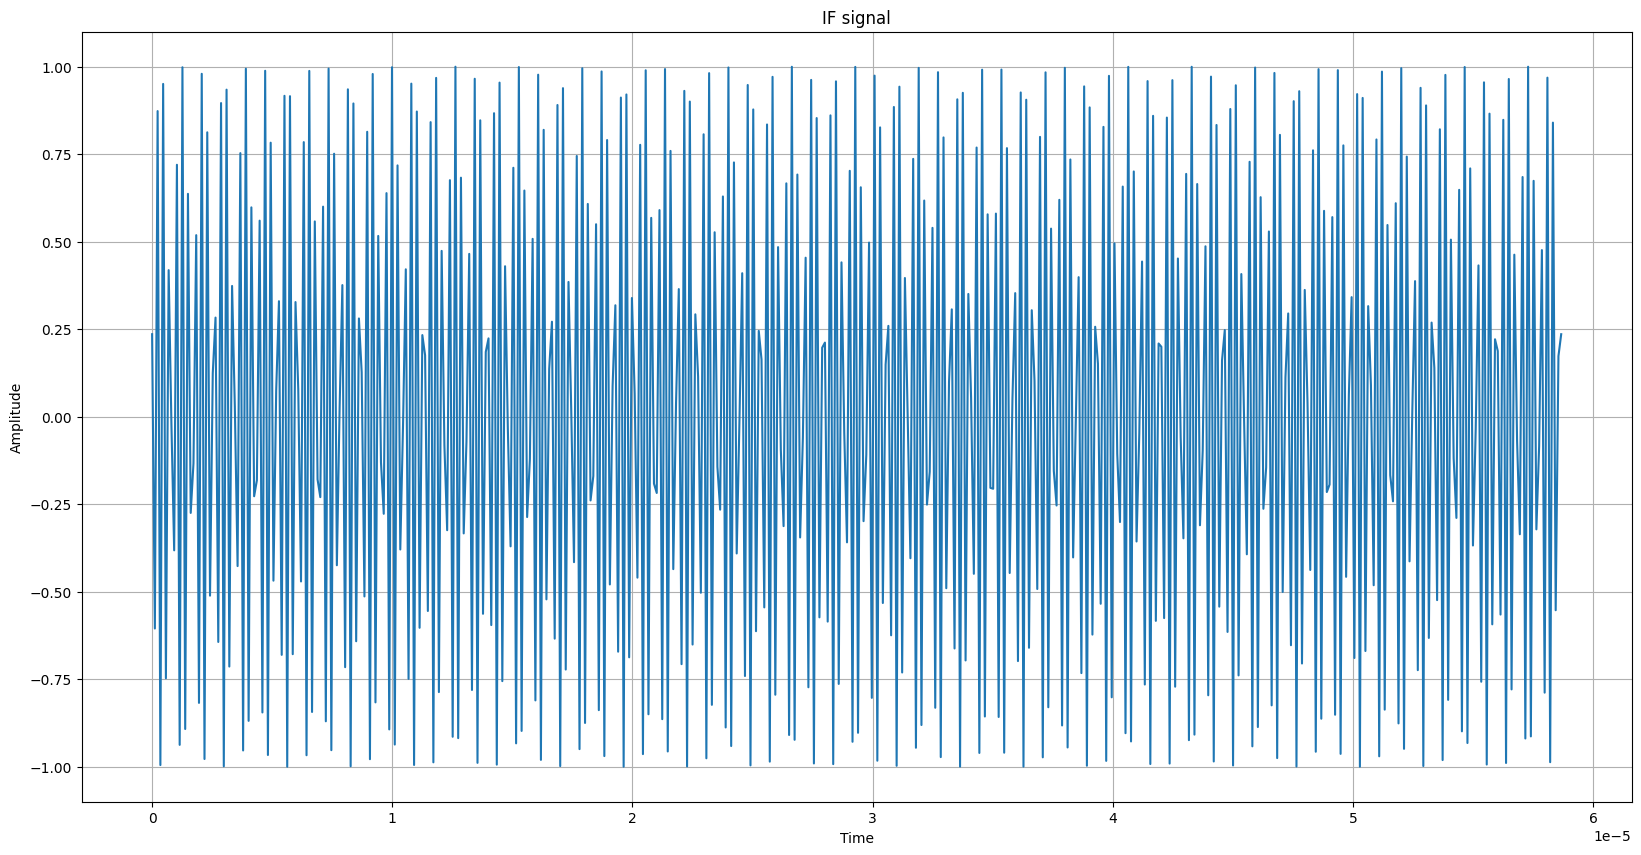

In [19]:
IF_angle_freq = fc*t+(slope*t*t)/2 - ((fc*(t-td) + (slope*(t-td)*(t-td))/2))
freqIF = slope*td
IFx = np.cos(-(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))+(2*np.pi*angle_freq))

plt.figure(figsize=(20,10))
plt.plot(t,IFx)
plt.grid()
plt.title('IF signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

5. FFT of the IF signal: in this step we calculate the frequency of IF signal by the FFT of IF signal.

Text(0.5, 1.0, 'IF Signal FFT')

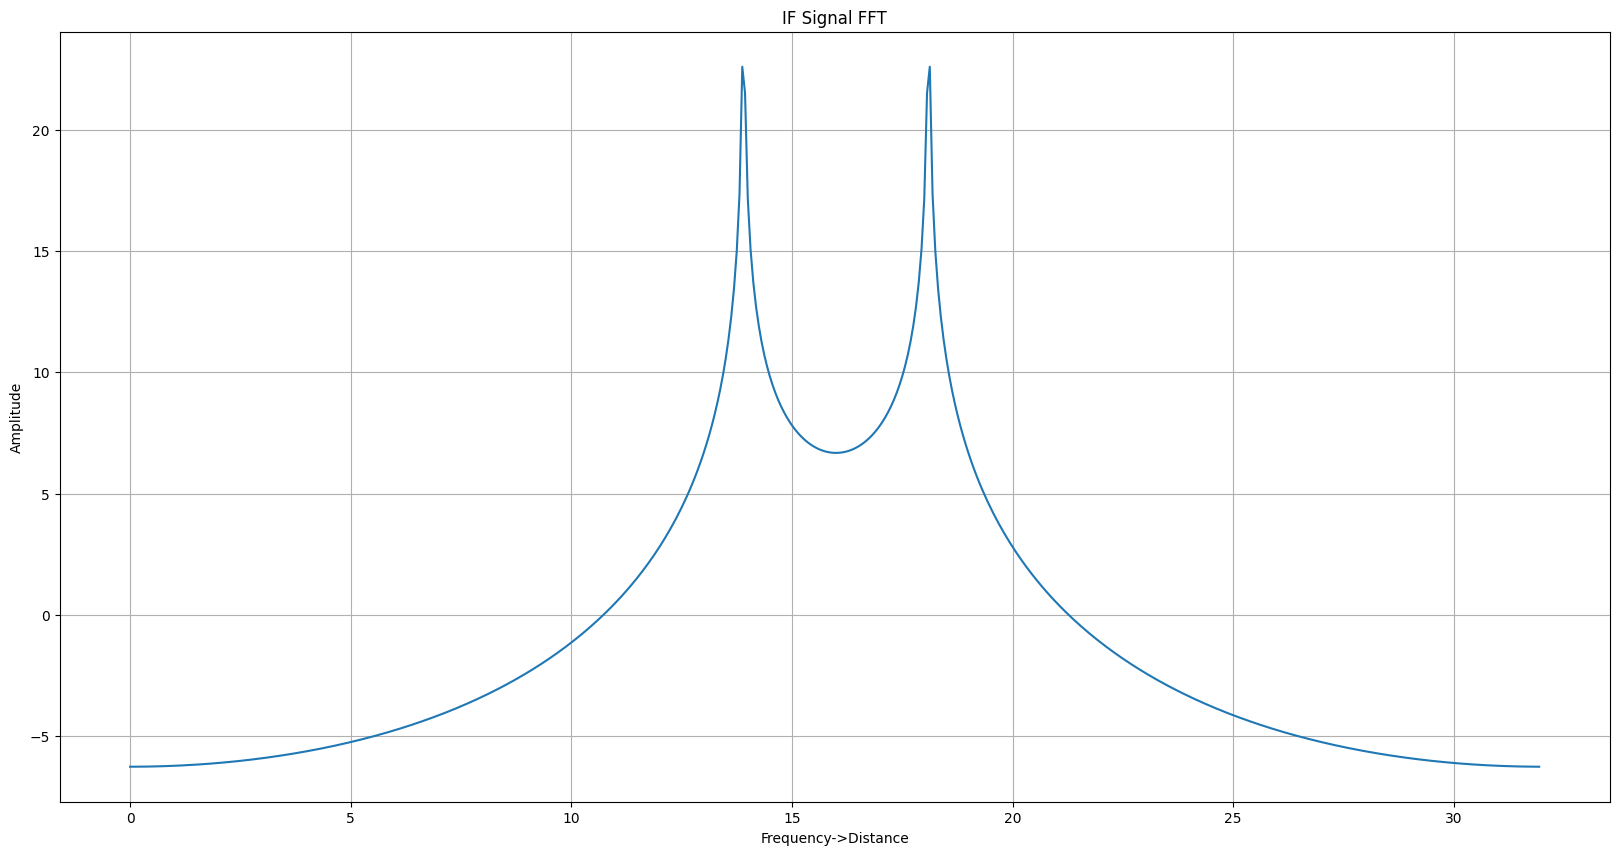

In [23]:
doppler = 10*np.log10(np.abs(np.fft.fft(IFx[0:1024])))
frequency = np.fft.fftfreq(1024, 1/Fs)
range = frequency*c/(2*slope)
plt.figure(figsize=(20,10))
plt.plot(range[0:512],doppler[0:512])
plt.grid()
plt.xlabel('Frequency->Distance')
plt.ylabel('Amplitude')
plt.title('IF Signal FFT')